<a href="https://colab.research.google.com/github/NishaB65/Twitter-US-Airline-Sentiment-Analysis-using-Natural-Language-Toolkit-NLTK-/blob/main/Twitter_US_Airline_Sentiment_Analysis_using_Natural_Language_Toolkit_(NLTK).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Twitter US Airline Sentiment Analysis using Natural Language Toolkit (NLTK)**

In [39]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [41]:
sentiment_data = pd.read_csv('/content/Sentiment Analysis.csv')
sentiment_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [42]:
sentiment_data.shape

(14640, 15)

In [43]:
sentiment_df = sentiment_data.drop(sentiment_data[sentiment_data['airline_sentiment_confidence']<0.5].index, axis= 0)

In [44]:
sentiment_df.shape

(14404, 15)

In [45]:
X = sentiment_df['text']
Y = sentiment_df['airline_sentiment']

In [46]:
X

0                      @VirginAmerica What @dhepburn said.
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
5        @VirginAmerica seriously would pay $30 a fligh...
                               ...                        
14634           @AmericanAir right on cue with the delays👌
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14404, dtype: object

In [47]:
Y

0         neutral
2         neutral
3        negative
4        negative
5        negative
           ...   
14634    negative
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14404, dtype: object

In [48]:
lemmatizer = WordNetLemmatizer()

In [49]:
stop_words = stopwords.words('english')
punctuations = string.punctuation

In [50]:
clean_data = []
for i in range(len(X)):
  text = re.sub('[^a-zA-Z]', ' ',X.iloc[i])
  text = text.lower().split()
  text = [lemmatizer.lemmatize(word) for word in text if (word not in stop_words) and (word not in punctuations)]
  text = ' '.join(text)
  clean_data.append(text)

In [51]:
clean_data

['virginamerica dhepburn said',
 'virginamerica today must mean need take another trip',
 'virginamerica really aggressive blast obnoxious entertainment guest face amp little recourse',
 'virginamerica really big bad thing',
 'virginamerica seriously would pay flight seat playing really bad thing flying va',
 'virginamerica yes nearly every time fly vx ear worm go away',
 'virginamerica really missed prime opportunity men without hat parody http co mwpg grezp',
 'virginamerica well',
 'virginamerica amazing arrived hour early good',
 'virginamerica know suicide second leading cause death among teen',
 'virginamerica lt pretty graphic much better minimal iconography',
 'virginamerica great deal already thinking nd trip australia amp even gone st trip yet p',
 'virginamerica virginmedia flying fabulous seductive sky u take stress away travel http co ahlxhhkiyn',
 'virginamerica thanks',
 'virginamerica sfo pdx schedule still mia',
 'virginamerica excited first cross country flight lax mc

In [52]:
sentiments = ['negative' , 'neutral', 'positive']
Y = Y.apply(lambda x: sentiments.index(x))

Y.head()

0    1
2    1
3    0
4    0
5    0
Name: airline_sentiment, dtype: int64

In [53]:
count_vectorizer = CountVectorizer(max_features = 5000, stop_words = ['virginamerica','united'])
X_fit = count_vectorizer.fit_transform(clean_data).toarray()
X_fit.shape

(14404, 5000)

In [54]:
model = MultinomialNB()

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X_fit,Y, test_size = 0.3, random_state=10)

In [60]:
model.fit(X_train,Y_train)

MultinomialNB()

In [61]:
y_pred = model.predict(X_test)

In [62]:
classification = classification_report(Y_test,y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      2723
           1       0.62      0.48      0.54       912
           2       0.71      0.67      0.69       687

    accuracy                           0.77      4322
   macro avg       0.72      0.68      0.69      4322
weighted avg       0.76      0.77      0.76      4322



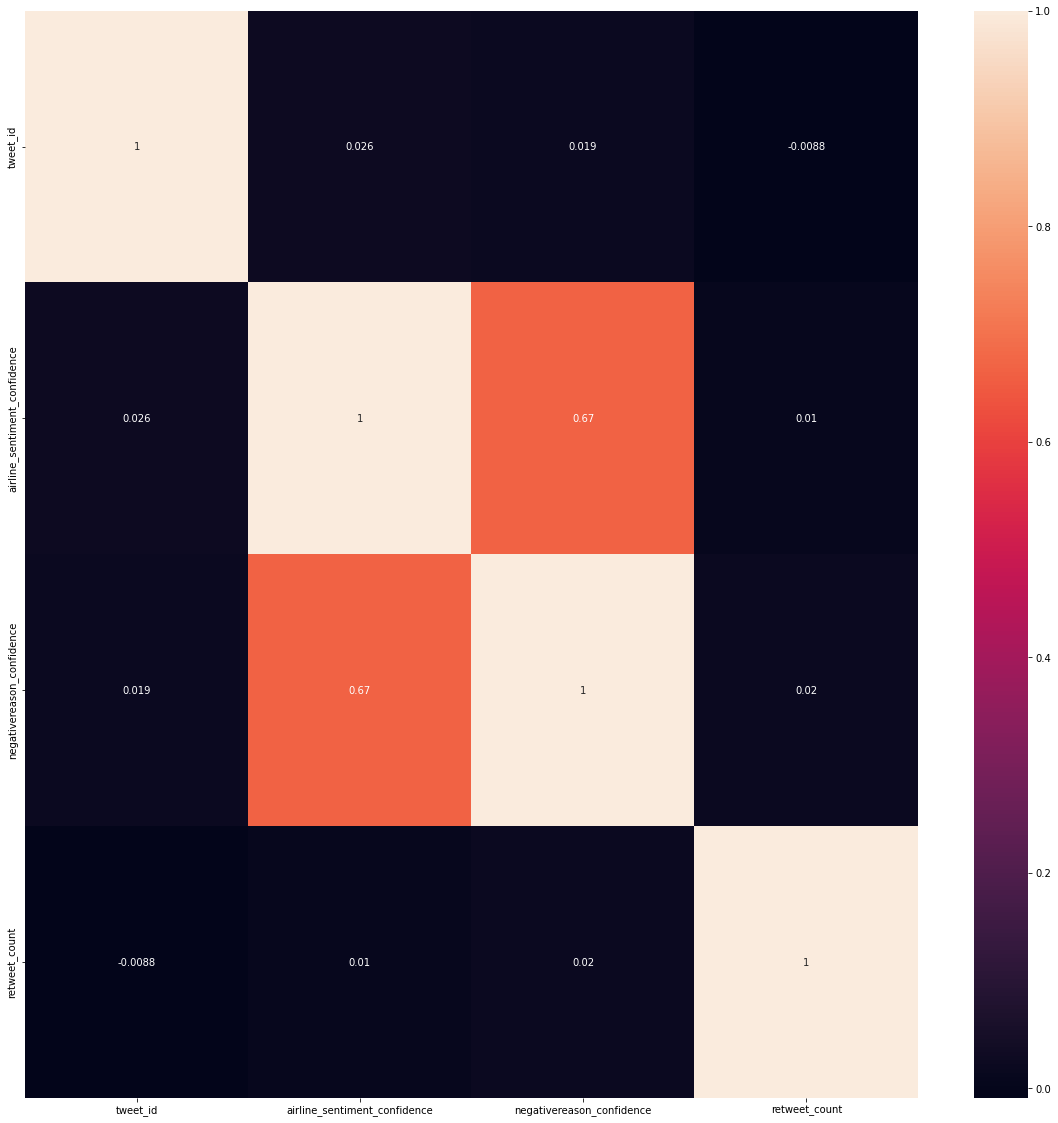

In [64]:
corrmat = sentiment_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(sentiment_df[top_corr_features].corr(),annot=True)